# Case Study 5:  Primes in Sage

In Sage, there are commands:

1. `prime_pi(x)` - the prime counting function $\pi(x) = \# \{ p < x : p \mbox{ prime} \}$.
2. `is_prime(x)`
3. `nth_prime(n)` - e.g. `nth_prime(1)` gives `2`
4. `li(x)` - the logarithmic integral $\operatorname{li}(x) := \int_2^x \frac{dt}{\ln t}$
5. `ln(x)` - the natural log
6. `primes(x)` - iterator of primes up to x
7. `list(primes(x))` - list of primes up to x

An iterator doesn't (necessarily) hold all its elements in memory at once, but can produce them on demand.  There's no random access, you can only get the elements in order.  Both an iterator and a list can be used in a for loop:  `for p in primes(10)` is just like `for p in list(primes(10))`.  But they are different concepts:  one is a list completely in memory, the other an object that produces outputs when called.  Iterators can be much more efficient.

The number of primes $\pi(x)$ is approximated by $\frac{x}{ln(x)}$ or $\operatorname{li}(x)$ where $\ln$ is the natural logarithm.  Create a graph that shows these three quantities for $x$ from $0$ to $10000$ then $100000$ etc.  You'll want to just use `plot( f(x), xmin = a, xmax = b)`$ syntax, keeping in mind you can add graphics objects and set colours to differentiate them.  Which approximation is the best?

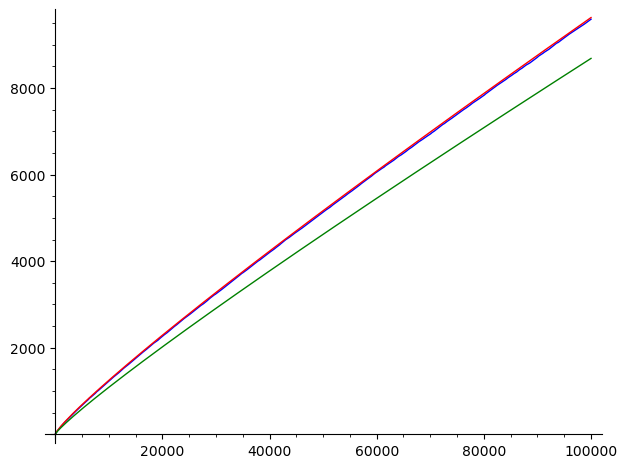

In [15]:
mn = 0
mx = 100000
G = Graphics()
G += plot( prime_pi(x), xmin = mn, xmax = mx, color="blue")
G += plot( li(x), xmin = mn, xmax = mx, color="red")
G += plot( x/ln(x), xmin = mn, xmax = mx, color="green")
G

How can you better examine the difference between $\pi(x)$ and $\operatorname{li}(x)$?  Can you produce a more informative graph?  This is a bit open-ended, but just play around a bit.  For example, is the approximation getting better or worse as $x$ increases?

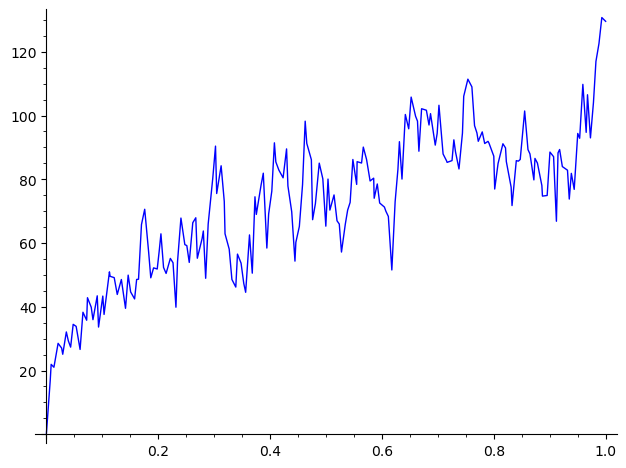

In [16]:
G = Graphics()
G += plot( li(x) - prime_pi(x), xmin = 0, xmax = 1000000, color="blue")
G

Consider the following graph.


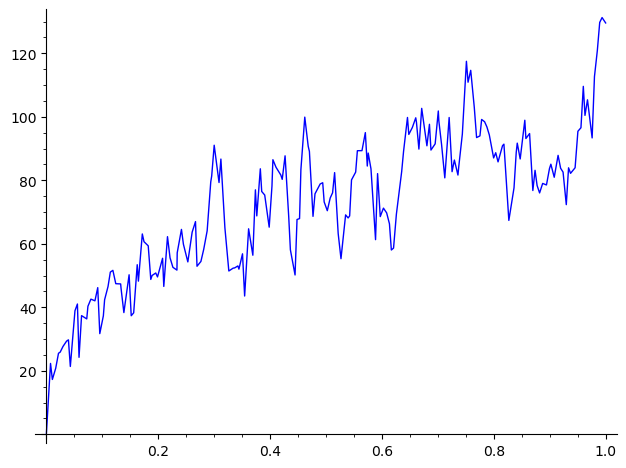

In [23]:
plot( li(x) - prime_pi(x), xmin = 0, xmax = 10^6, color="blue")

Then try adding the parameter `plot_points=10^4`.  What's happening?

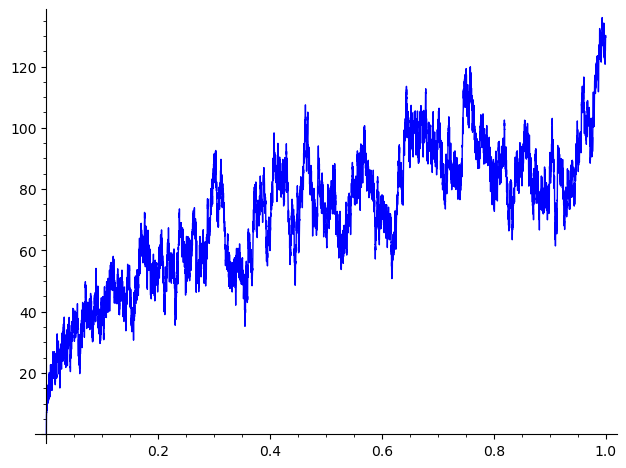

In [25]:
plot( li(x) - prime_pi(x), xmin = 0, xmax = 10^6, color="blue", plot_points=10^4)

Now try to approximate the function $\operatorname{li}(x) - \pi(x)$ by a power of $r$.

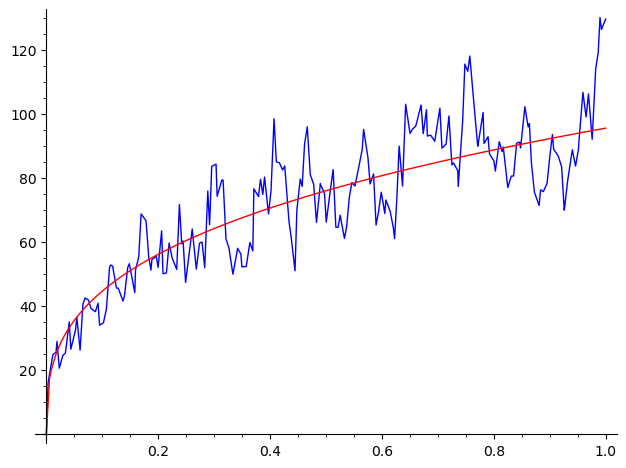

In [34]:
mn = 0
mx = 10^6
G = plot( li(x) - prime_pi(x), xmin = mn, xmax = mx, color="blue")
G += plot( x^0.33, xmin = mn, xmax = mx, color="red")
G

A better way to try to get at this exponent is to use loglog axes.  Try parameters `scale='loglog'` or `scale='semilogx'` or `scale='semilogy'` in the `show()` command.  What's happening?  Can you get a better fit?  Fiddle with min/max for x also.  How far can you push the data?

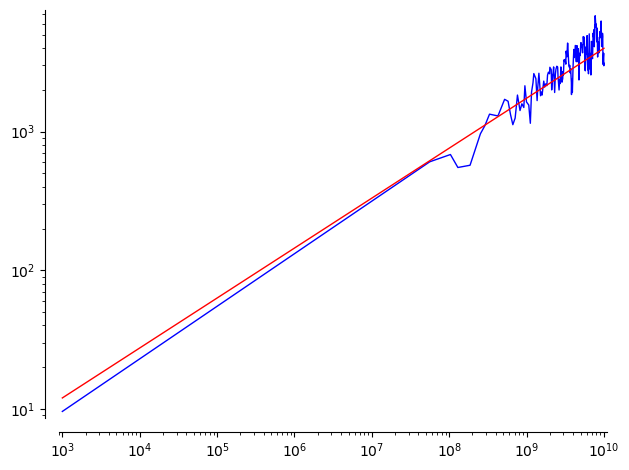

In [50]:
mn = 10^3
mx = 10^10
G = plot( li(x) - prime_pi(x), xmin = mn, xmax = mx, color="blue")
G += plot( x^0.36, xmin = mn, xmax = mx, color="red")
G.show(scale='loglog')

Now instead of using loglog axes, adjust the functions themselves (and the limits on x) to get the same picture.  What's different?

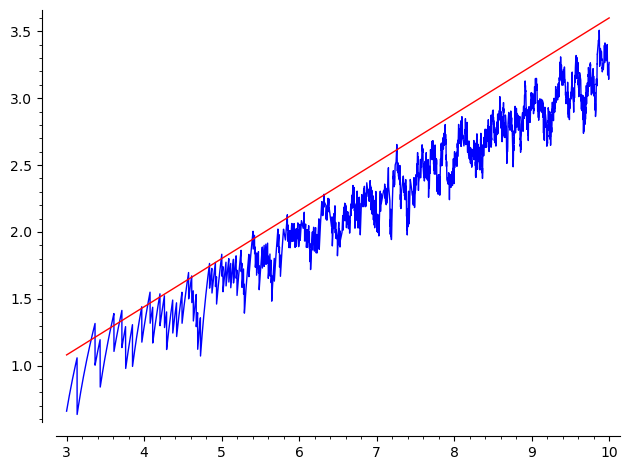

In [59]:
mn = 3
mx = 10
G = plot( ln(li(e^x) - prime_pi(e^x)), xmin = mn, xmax = mx, color="blue")
G += plot( 0.36*x, xmin = mn, xmax = mx, color="red")
G.show()

Do you need to adjust your approximation again?

Actually, it's been proven that $\pi(x) - \operatorname{li}(x)$ *changes sign* infinitely often!  We haven't seen it happen, but we know the first time it happens is below $10^{10^{10^{34}}}$.  Data can be misleading in many ways.

The prime number theorem says $\pi(x) \sim \operatorname{li}(x) \sim \frac{x}{\ln(x)}$, i.e. the ratio of any two of these goes to 1 as x increases.

## The Chebyshev function

The appearance of $\ln(x)$ is a hint that a "better" prime counting function is the Chebyshev function
$$
\phi(x) := \sum_{prime powers p^k \le x} \ln(p) = \sum_{n \le x} \Lambda(n)
$$
where $\Lambda(n)$ (the von Mangoldt function) is $\ln(p)$ on prime powers and $0$ otherwise (a nice convenience).

Plot this guy.  You'll have to program a formula for it.  This becomes a bit of a hassle.  Some tips:

1. Be sure you _start_ your range of x inputs large enough.
2. You can use `RR()` (cast to Sage's real field) or `.n()` (make a symbolic thing numeric).  The difference involves subtleties to do with precision.  This will vastly speed stuff up (sage will try to add all those logs symbolically by default).
3. If plot isn't working for you directly, try making a list of datapts and then using `list_plot` (optional `plotjoined=True`).  The gotcha here is again that sage tries to keep everything symbolic until you force it not to, so depending how you program your `chebyshev_psi`, Sage can be trying to make the two (symbolic and numeric) interact and complain with something like `cannot evaluate symbolic expression to a numeric value`.

19.2656583145480


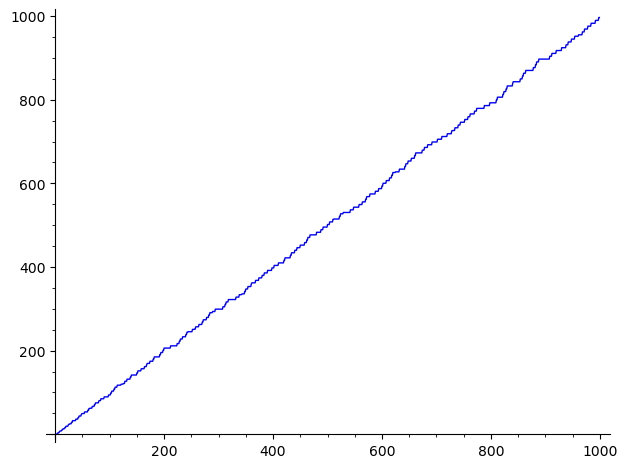

In [136]:
def chebyshev_psi(x):
    x = RR(x)
    return RR(sum([sum([ RR(ln(RR(p))) for k in range( floor( ln(x)/ln(RR(p)) ) ) ]) for p in primes(floor(x)) ]))

# should be 19.2656583145480
print(chebyshev_psi(20))

# plot( chebyshev_psi(x), xmin = 10, xmax = 100) # FAILS
datapts = [ (x, chebyshev_psi(x)) for x in srange(3,1000) ]
G = list_plot(datapts, plotjoined=True)
G.show()

What power of $x$ does this look like?

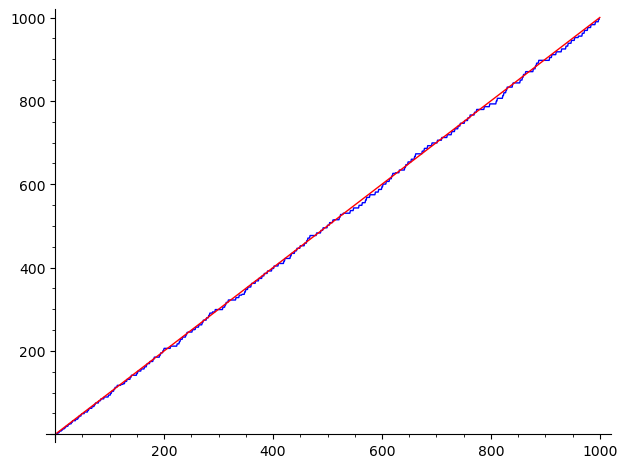

In [137]:
G += plot(x, xmin = 3, xmax = 1000, color="red")
G

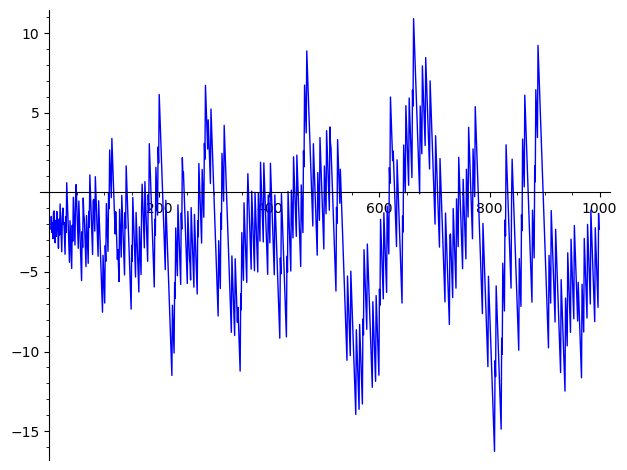

In [138]:
datapts_diff = [ (x, chebyshev_psi(x)-x) for x in srange(3,1000) ]
list_plot(datapts_diff, plotjoined=True)

In terms of the Chebyshev function, the Prime Number Theorem says
$$
\psi(x) \sim x.
$$

The error bound on the prime number theorem is known to be around (there are slight improvements):
$$
\pi(x) = \operatorname{li}(x) + O(x e^{-a \sqrt{\log(x)}})
$$
But if the Riemann Hypothesis holds, then we have the vastly superior error:
$$
\pi(x) = \operatorname{li}(x) + O(\sqrt{x} \log(x))
$$


## The Riemann Zeta Function

The Riemann Zeta function is
$$
\zeta(s) = \sum_{n=1}^\infty \frac{1}{n^s} = \prod_{p} \left( 1 - \frac{1}{p^s} \right)^{-1}.
$$
The expression at right is known as the Euler product expansion, and is basically a restatement of unique factorization.

The $s$ seems superfluous, but it makes this thing into a function, instead of a number (or non-convergent series; where does it converge??).  Think of it as a sort of generating function.  And why not let $s$ be complex?

In Sage, we have `zeta(x)`.  This complex function has a simple pole at $s=1$ and can be analytically continued to the whole complex plane via
$$
\zeta(s) = 2^s \pi^{s-1} \sin(\pi s/2) \Gamma(1-s) \zeta(1-s).
$$
We also have `gamma(x)` which interpolates the factorial function.

Since these are complex functions, we want to use what's called _domain colouring_ to visualize them.

The following cell shows the complex plane coloured so that every point has a particular colour.  Pale points are near infinity (which is white) and dark points are near the origin (which is black).

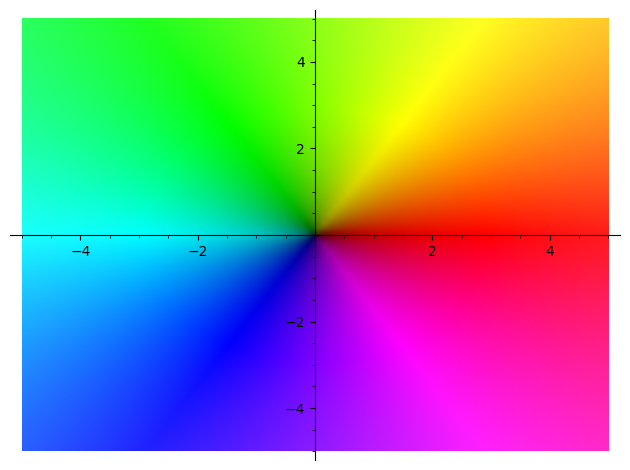

In [139]:
complex_plot(x, (-5, 5), (-5, 5))

To plot an arbitrary function, we put the OUTPUT colour at the INPUT location.  Explain the following result.  For example, can you see the fundamental theorem of arithmetic at work?  Where does infinity map to?  And zero?

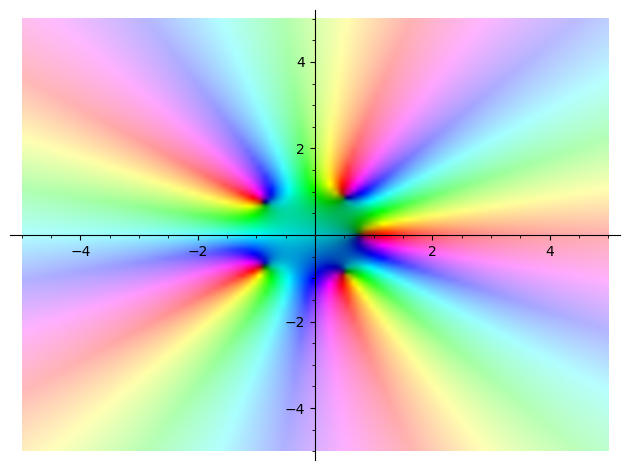

In [140]:
complex_plot(x^5 + x - 1, (-5, 5), (-5, 5))

Make a complex plot of the zeta function.  Adjust the boundaries until you can see a bunch of zeroes that are not on the real line.  The option `aspect_ratio = 1` is helpful sometimes.

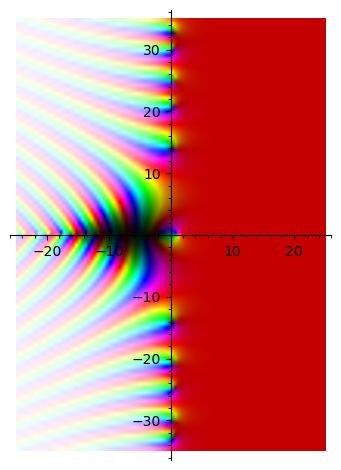

In [141]:
complex_plot(zeta(x), (-25, 25), (-35, 35), aspect_ratio = 1)

Might as well plot gamma too.

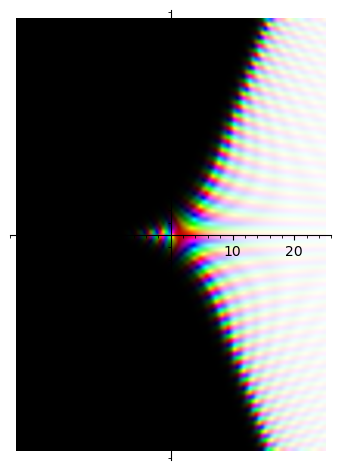

In [142]:
complex_plot(gamma(x), (-25, 25), (-35, 35), aspect_ratio = 1)

Zoom in on the zeta plot around $1/2 + 14i$.  This is near one of the non-trivial zeroes of the Zeta function on the critical line $re(s) = 1/2$.

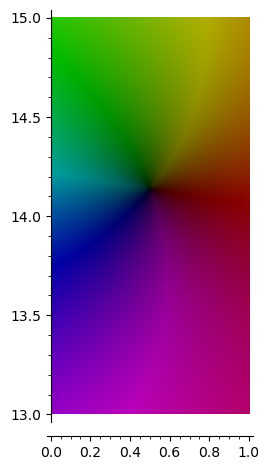

In [143]:
complex_plot(zeta(x), (0,1), (13,15), aspect_ratio = 1)

Make sure you have zeta zeroes available.  Try each of the following two cells to figure out which works on your system.

If you want to install the sage database of zeroes, *DON'T DO THIS NOW*, but run `sage -i database_odlyzko_zeta` at the command line (BEWARE:  may take an hour, and ties up your kernel)

In [1]:
# check if zeta zeroes installed on Sage
from sage.misc.package import is_package_installed
is_package_installed("database_odlyzko_zeta")
# if so, get the 5th zero
zz = zeta_zeros()
zz[4] # 5th zero

32.935061588

In [2]:
# zeta zeroes from mpmath
from mpmath import zetazero
zetazero(5) # 5th zero

mpc(real='0.5', imag='32.935061587739192')

Just look at those lovely ripples in the large-view plots of the Riemann zeta function!  Don't you want to do a Fourier transform?

Let's make the zeroes into poles by considering the logarithmic derivative.  One can prove (from the Euler product expansion) that
$$
\frac{\zeta'(s)}{\zeta(s)} = - \sum_{p^k} \frac{\ln(p)}{p^{ks}}.
$$
This function is closely related to the primes and still carries the info of the zeta zeroes (now poles) but in a handier form (there are lots of reasons for this form, but focus just on the fact that this has poles at the zeroes for now).

Now, if we restrict to the critical line $re(s) = 1/2$, i.e. $s = 1/2 + \theta i$, we get
$$
- \sum_{p^k} \frac{\ln(p)}{p^{k/2}} e^{i \theta \ln(p^k)}.
$$ 

If we look at the real part, we can call it

$$
F(\theta) = - \sum_{p^k} \frac{\ln(p)}{p^{k/2}} cos( \theta \ln(p^k)).
$$

Graph $F(\theta)$ as a real function, by partial sums of the formula above (including prime powers up to some bound).  Try increasing the bound and look at the picture.  In your graph, place dots on the x-axis at the Riemann spectrum (the imaginary parts of the zeroes on the critical strip).

In [45]:
def F(theta, bd):
    sum = 0
    for p in primes(bd+1):
        lnp = RR(ln(p))
        for k in range( 1, floor( ln(bd)/lnp )+1 ):
            #print(p^k)
            sum -= RR((lnp/p^(k/2))*cos( theta*k*lnp ))
    return sum

In [46]:
# test
F(zz[4],200)

4.63714291491119

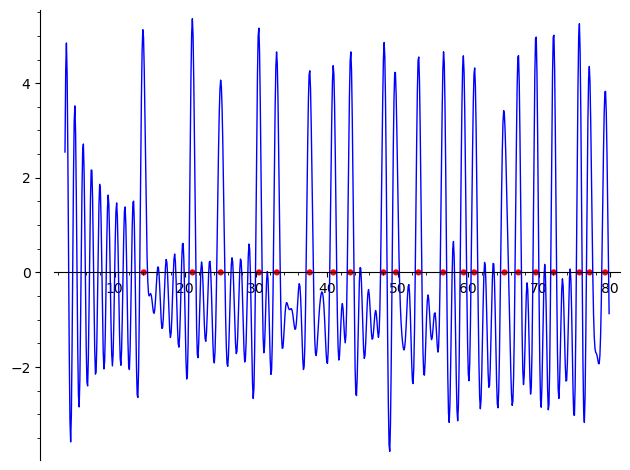

In [50]:
detail = 10
pkbd = 200
datapts = [ (x, F(x,pkbd)) for x in srange(3, 80, 1/detail) ]
G = list_plot(datapts, plotjoined=True)
for zer in zz[:21]:
    G += point( (zer,0), color="red", size=20)
G.show()

As a complement to this computation, compute and display
$$
f(s) = -\sum_{k=1}^\infty \cos(\ln(s) \theta_k)
$$
where $\theta_k$ is the imaginary part of the $k$-th Riemann zero.  Where are the spikes located?

In [52]:
def f(s, bd):
    sum = 0
    lns = RR(ln(s))
    for k in range( 1, bd+1 ):
            #print(p^k)
            sum -= cos( zz[k-1]*lns )
    return sum

In [53]:
# test
f(11, 100)

26.0714776214655

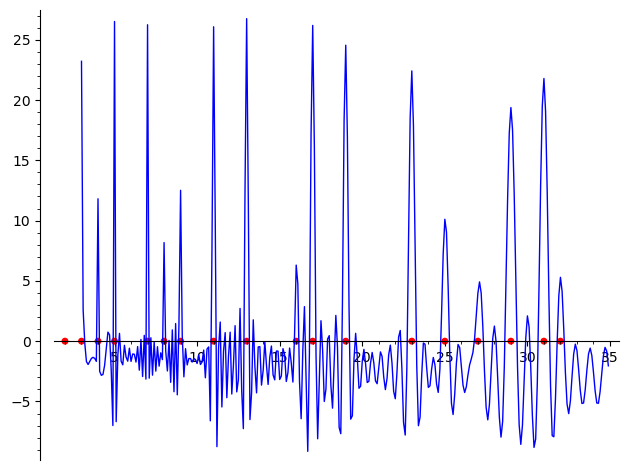

In [59]:
detail = 10
kbd = 100
datapts = [ (x, f(x,kbd)) for x in srange(3, 35, 1/detail) ]
G = list_plot(datapts, plotjoined=True)
for p in primes(35):
    for k in range(1, floor(ln(35)/ln(p))+1 ):
        G += point( (p^k,0), color="red", size=25)
G.show()

## Coda

Finally, one more experiment.  Let's watch the Riemann zeta function converge.  Going back to its expression, 
$$
\zeta(s) = \sum_{n=1}^\infty \frac{1}{n^s},
$$
let's now compute the successive partial sums and graph them on the complex plane.  Draw a line segment from each position to the next to watch the value converge to $\zeta(s)$ (or diverge!).  Try different $s$, e.g. $1.3 + 3i$.  To reference $i$, just write `i`.  The complex field is `CC` and you can call `x.real()` and `x.imag()`.  Think at least a little about efficiency.

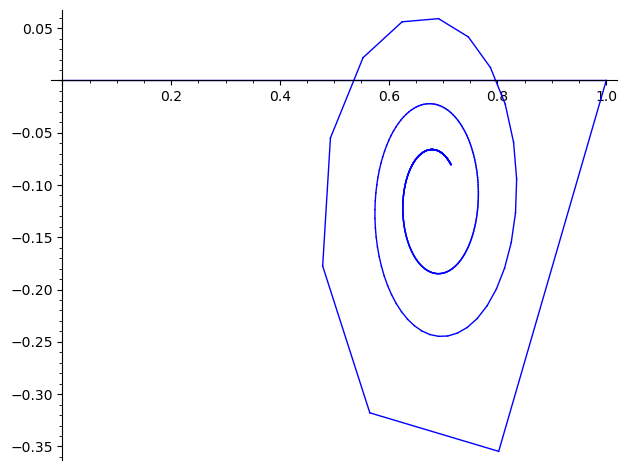

In [86]:
partialbd = 700
s = 1.3 + 3*i
G = Graphics()
sum = 0
last = 0
for n in range(1,partialbd):
    last = sum
    sum += 1/n^s
    G += line( [(last.real(), last.imag()), (sum.real(), sum.imag())] )
G